In [2]:
import pandas as pd

In [206]:
figure_folder = 'figures/015_what_happened_to_rps24_and_pkm'
! mkdir -p $figure_folder

In [207]:
from __future__ import print_function

In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [231]:
folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
original_folder = '{}/outrigger_v2/psi'.format(folder)
rmdup_folder = '{}/csvs_for_paper/outrigger_v2_rmdup/psi'.format(folder)

In [287]:
figure_folder = 'figures/015_what_happened_to_rps24_and_pkm'

In [3]:
rps24_events = pd.Index([u'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79797196:+@novel_exon:chr10:79797197-79797199:+@junction:chr10:79797200-79800372:+',
       u'isoform1=junction:chr10:79797063-79799961:+|isoform2=junction:chr10:79797063-79797196:+@novel_exon:chr10:79797197-79797199:+@junction:chr10:79797200-79799961:+',
       u'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+',
       u'isoform1=junction:chr10:79797200-79800372:+|isoform2=junction:chr10:79797200-79797722:+@novel_exon:chr10:79797723-79797751:+@junction:chr10:79797752-79800372:+',
       u'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79797722:+@exon:chr10:79797723-79797740:+@junction:chr10:79797741-79800372:+',
       u'isoform1=junction:chr10:79797200-79800372:+|isoform2=junction:chr10:79797200-79797722:+@exon:chr10:79797723-79797740:+@junction:chr10:79797741-79800372:+',
       u'isoform1=junction:chr10:79797200-79800372:+|isoform2=junction:chr10:79797200-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+',
       u'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79797722:+@novel_exon:chr10:79797723-79797751:+@junction:chr10:79797752-79800372:+',
       u'isoform1=junction:chr10:79797200-79799961:+|isoform2=junction:chr10:79797200-79797722:+@exon:chr10:79797723-79797740:+@junction:chr10:79797741-79799961:+',
       u'isoform1=junction:chr10:79797063-79797722:+|isoform2=junction:chr10:79797063-79797196:+@novel_exon:chr10:79797197-79797199:+@junction:chr10:79797200-79797722:+',
       u'isoform1=junction:chr10:79797063-79799961:+|isoform2=junction:chr10:79797063-79797722:+@exon:chr10:79797723-79797740:+@junction:chr10:79797741-79799961:+',
       u'isoform1=junction:chr10:79797741-79800372:+|isoform2=junction:chr10:79797741-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+'],
      dtype='object', name=u'event_id')

In [6]:
alternative_exon = 'exon:chr10:79799962-79799983'

In [7]:
rps24_events = [x for x in rps24_events if alternative_exon in x]
rps24_events

[u'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+',
 u'isoform1=junction:chr10:79797200-79800372:+|isoform2=junction:chr10:79797200-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+',
 u'isoform1=junction:chr10:79797741-79800372:+|isoform2=junction:chr10:79797741-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+']

In [24]:
rps24_event = 'isoform1=junction:chr10:79797063-79800372:+|'\
'isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+'
rps24_event

'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+'

In [11]:
pkm_mxe_event = u'isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-'\
'|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-'
pkm_mxe_event

u'isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-'

In [240]:
summary = pd.read_csv('{}/outrigger_summary_original_rmdup_combined.csv'.format(folder))
print(summary.shape)

(12567319, 26)


/home/obotvinnik/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [242]:
rps24_summary = summary.query('event_id == @rps24_event')
print(rps24_summary.shape)
rps24_summary.head()

(251, 26)


,sample_id,event_id,incompatible_junction0_original,incompatible_junction1_original,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original,notes_original,...,isoform1_junction13_rmdup,isoform1_junction34_rmdup,isoform2_junction12_rmdup,isoform2_junction23_rmdup,isoform2_junction24_rmdup,notes_rmdup,psi_rmdup,bam,notes_abbrev_rmdup,dataset_rmdup
277606,CVN_01,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,0,NaN,729,677.0,NaN,Case 8: Inclusion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277607,CVN_02,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,0,NaN,451,419.0,NaN,Case 8: Inclusion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277608,CVN_03,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,0,NaN,345,330.0,NaN,Case 8: Inclusion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277609,CVN_04,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,0,NaN,402,417.0,NaN,Case 8: Inclusion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277610,CVN_05,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,0,NaN,580,541.0,NaN,Case 8: Inclusion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
pkm_summary = summary.query('event_id == @pkm_mxe_event').set_index('sample_id')
print(pkm_summary.shape)
pkm_summary.head()

(251, 25)


,event_id,incompatible_junction0_original,incompatible_junction1_original,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original,notes_original,psi_original,...,isoform1_junction13_rmdup,isoform1_junction34_rmdup,isoform2_junction12_rmdup,isoform2_junction23_rmdup,isoform2_junction24_rmdup,notes_rmdup,psi_rmdup,bam,notes_abbrev_rmdup,dataset_rmdup
sample_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,NaN,158,124.0,0,NaN,19.0,Case 6: Unequal read coverage (one side has at...,NaN,...,51.0,53.0,0.0,NaN,0.0,Case 6: Exclusion,0.0,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 6,rmdup
CVN_02,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,NaN,44,40.0,0,NaN,10.0,Case 6: Unequal read coverage (one side has at...,NaN,...,24.0,0.0,0.0,NaN,0.0,Case 4: Only one junction with sufficient reads,NaN,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 4,rmdup
CVN_03,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,NaN,100,64.0,0,NaN,14.0,Case 6: Unequal read coverage (one side has at...,NaN,...,39.0,0.0,0.0,NaN,0.0,Case 4: Only one junction with sufficient reads,NaN,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 4,rmdup
CVN_04,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,NaN,183,160.0,0,NaN,26.0,Case 6: Unequal read coverage (one side has at...,NaN,...,56.0,50.0,0.0,NaN,0.0,Case 6: Exclusion,0.0,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 6,rmdup
CVN_05,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,NaN,110,92.0,61,NaN,55.0,Case 9: Sufficient reads on all junctions,0.36478,...,39.0,39.0,0.0,NaN,23.0,Case 5: Unequal read coverage (one side has at...,NaN,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 5,rmdup


In [249]:
case_order = ['Case {}'.format(i+1) for i in range(8)] + ['Case {}{}'.format(i+1, x) for i in range(8, 11) for x in 'ab']
case_order

['Case 1',
 'Case 2',
 'Case 3',
 'Case 4',
 'Case 5',
 'Case 6',
 'Case 7',
 'Case 8',
 'Case 9a',
 'Case 9b',
 'Case 10a',
 'Case 10b',
 'Case 11a',
 'Case 11b']

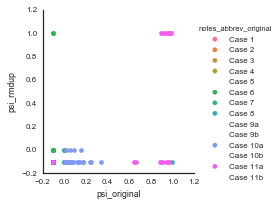

In [289]:
g = sns.FacetGrid(pkm_summary.fillna(-0.1), hue='notes_abbrev_original', hue_order=case_order)
g.map(plt.scatter, 'psi_original', 'psi_rmdup')
g.add_legend()
g.savefig('{}/psi_original_vs_rmdup_hue_by_original_case.pdf'.format(figure_folder))

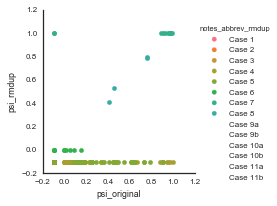

In [288]:
g = sns.FacetGrid(pkm_summary.fillna(-0.1), hue='notes_abbrev_rmdup', hue_order=case_order)
g.map(plt.scatter, 'psi_original', 'psi_rmdup')
g.add_legend()
g.savefig('{}/psi_original_vs_rmdup_hue_by_rmdup_case.pdf'.format(figure_folder))

In [270]:
original_compatible_junctions = [x for x in pkm_summary if x.startswith('isoform') & x.endswith('original')]
original_compatible_reads = pkm_summary[original_compatible_junctions]
original_compatible_reads.head()

,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original
sample_id,,,,,
CVN_01,158,124.0,0,NaN,19.0
CVN_02,44,40.0,0,NaN,10.0
CVN_03,100,64.0,0,NaN,14.0
CVN_04,183,160.0,0,NaN,26.0
CVN_05,110,92.0,61,NaN,55.0


In [271]:
rmdup_compatible_junctions = [x for x in pkm_summary if x.startswith('isoform') & x.endswith('rmdup')]
rmdup_compatible_reads = pkm_summary[rmdup_compatible_junctions]
rmdup_compatible_reads.head()

,isoform1_junction13_rmdup,isoform1_junction34_rmdup,isoform2_junction12_rmdup,isoform2_junction23_rmdup,isoform2_junction24_rmdup
sample_id,,,,,
CVN_01,51.0,53.0,0.0,NaN,0.0
CVN_02,24.0,0.0,0.0,NaN,0.0
CVN_03,39.0,0.0,0.0,NaN,0.0
CVN_04,56.0,50.0,0.0,NaN,0.0
CVN_05,39.0,39.0,0.0,NaN,23.0


In [272]:
original_compatible_reads.max().max()

2455.0

In [273]:
np.log10(original_compatible_reads.max().max())

3.3900514964589874

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


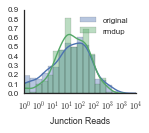

In [299]:
fig, ax = plt.subplots(figsize=(2, 1.5))

bins = np.linspace(0, 4, 20)

sns.distplot(np.log10(original_compatible_reads).values.flat, bins=bins, hist_kws=dict(range=(0, max(bins))), label='original')
sns.distplot(np.log10(rmdup_compatible_reads).values.flat, bins=bins, hist_kws=dict(range=(0, max(bins))), label='rmdup')
sns.despine()

ax.legend()
ax.set(xlabel='Junction Reads', xlim=(0, max(bins)))

xticks = ax.get_xticks()
xticklabels = ['$10^{{{x}}}$'.format(x=int(x)) for x in xticks]
ax.set(xticklabels=xticklabels)

fig.savefig('{}/junction_reads_pkm_histogram.pdf'.format(figure_folder))

original_incompatible_junctions = [x for x in pkm_summary if x.startswith('incompatible') & x.endswith('original')]
original_incompatible_reads = pkm_summary[original_incompatible_junctions]
original_incompatible_reads = original_incompatible_reads[original_incompatible_reads > 0].dropna(how='all')
original_incompatible_reads.head()

In [285]:
rmdup_incompatible_junctions = [x for x in pkm_summary if x.startswith('incompatible') & x.endswith('rmdup')]
rmdup_incompatible_reads = pkm_summary[rmdup_incompatible_junctions]
rmdup_incompatible_reads = rmdup_incompatible_reads[rmdup_incompatible_reads > 0].dropna(how='all')
rmdup_incompatible_reads.head()

,incompatible_junction0_rmdup,incompatible_junction1_rmdup
sample_id,,
MSA_17,103.0,NaN
P8_02,5.0,NaN


In [281]:
original_incompatible_reads.max().max()

99.0

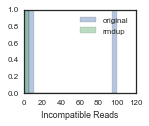

In [297]:
fig, ax = plt.subplots(figsize=(2, 1.5))

bins = np.linspace(0, 100, 20)

sns.distplot(original_incompatible_reads.values.flat, bins=bins, hist_kws=dict(range=(0, max(bins))), 
             kde=False, label='original')
sns.distplot(rmdup_incompatible_reads.values.flat, bins=bins, hist_kws=dict(range=(0, max(bins))), 
             kde=False, label='rmdup')
ax.legend()
ax.set(xlabel='Incompatible Reads')
fig.savefig('{}/incompatible_reads_pkm_histogram.pdf'.format(figure_folder))

In [ ]:
g = sns.FacetGrid(pkm_summary, hue='notes_rmdup')
g.map(plt.scatter, 'psi_original', 'psi_rmdup')

In [230]:
pkm_summary.groupby('notes_original').size()

notes_original
Case 10a: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are insufficient junction reads     1
Case 10a: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are sufficient junction reads      66
Case 11a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads      3
Case 11a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads       16
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                                1
Case 2: Zero observed reads                                                                                                              43
Case 3: All junctions with insufficient reads                                                                                            12
Case 

In [228]:
pkm_summary.groupby('notes_rmdup').size()

notes_rmdup
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                              1
Case 2: Zero observed reads                                                                                                            56
Case 3: All junctions with insufficient reads                                                                                          20
Case 4: Only one junction with sufficient reads                                                                                       138
Case 5: Unequal read coverage (one side has at least 10x more reads)                                                                   51
Case 6: Exclusion                                                                                                                      15
Case 7: Inclusion                                                                                                                      12
Case 8: Sufficient rea

In [32]:
# pkm_summary.query('notes == "Case 5: Unequal read coverage (one side has at least 10x more reads)"')

In [31]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

import flotilla


flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

# not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2017-01-06 09:51:57	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2017-01-06 09:51:57	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2017-01-06 09:52:23 	Initializing Study
2017-01-06 09:52:23 	Initializing Predictor configuration manager for Study
2017-01-06 09:52:23	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-06 09:52:23	Added ExtraTreesClassifier to default predictors
2017-01-06 09:52:23	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-06 09:52:23	Added ExtraTreesRegressor to default predictors
2017-01-06 09:52:23	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-06 09:52:23	Added GradientBoostingClassi

Error loading species hg19 data: HTTP Error 404: Not Found

## Make sample order

In [146]:
study.metadata.data['phenotype'] = pd.Categorical(study.metadata.data['phenotype'], 
                                                  categories=study.phenotype_order, ordered=True)
study.metadata.data['phenotype']

CVN_01     NPC
CVN_02     NPC
CVN_03     NPC
CVN_04     NPC
CVN_05     NPC
CVN_06     NPC
CVN_07     NPC
CVN_08     NPC
CVN_09     NPC
CVN_11     NPC
CVN_12     NPC
CVN_13     NPC
CVN_14     NPC
CVN_15     NPC
CVN_16     NPC
CVN_17     NPC
CVN_18     NPC
CVN_19     NPC
CVN_20     NPC
CVN_21     NPC
CVN_22     NPC
CVN_23     NPC
CVN_24     NPC
CVN_25     NPC
CVN_26     NPC
CVN_27     NPC
CVN_28     NPC
CVN_29     NPC
CVN_30     NPC
CVN_31     NPC
          ... 
P4_09     iPSC
P4_10     iPSC
P4_11     iPSC
P4_12     iPSC
P6_01     iPSC
P6_02     iPSC
P6_03     iPSC
P6_04     iPSC
P7_01     iPSC
P7_02     iPSC
P7_03     iPSC
P7_04     iPSC
P7_05     iPSC
P7_06     iPSC
P7_07     iPSC
P7_08     iPSC
P7_09     iPSC
P7_10     iPSC
P7_11     iPSC
P7_12     iPSC
P8_01     iPSC
P8_02     iPSC
P8_05     iPSC
P8_06     iPSC
P8_10     iPSC
P8_11     iPSC
P9_01     iPSC
P9_02     iPSC
P9_03     iPSC
P9_04     iPSC
Name: phenotype, dtype: category
Categories (3, object): [iPSC < NPC < MN]

In [173]:
metadata_sorted = study.metadata.data.sort_values(['phenotype', 'single', 'outlier'])
metadata_sorted.head()

,single,pooled,phenotype,neuron,progenitor,stressed,craig_venter,differentiation_batch,split,outlier
M2nd_33,False,True,iPSC,False,True,False,True,batch2,NaN,False
M2nd_34,False,True,iPSC,False,True,False,True,batch2,NaN,False
P1_01,True,False,iPSC,False,True,False,True,NaN,NaN,False
P1_02,True,False,iPSC,False,True,False,True,NaN,NaN,False
P1_03,True,False,iPSC,False,True,False,True,NaN,NaN,False


In [174]:
def assign_colors(row):
    if row.single:
        if row.outlier:
            return 'outlier', 'grey'
        else:
            return 'single {}'.format(row.phenotype), study.phenotype_to_color[row.phenotype]
    else:
        return 'pooled', 'black'

color_labels = metadata_sorted.apply(assign_colors, axis=1).apply(pd.Series)
color_labels.columns = ['label', 'color']
# metadata_sorted.head()
color_labels.head()

,label,color
M2nd_33,pooled,black
M2nd_34,pooled,black
P1_01,single iPSC,#c7e9c0
P1_02,single iPSC,#c7e9c0
P1_03,single iPSC,#c7e9c0


In [175]:
palette = dict(zip(color_labels['label'], color_labels['color']))
palette

{'outlier': 'grey',
 'pooled': 'black',
 'single MN': u'#228a44',
 'single NPC': u'#73c476',
 'single iPSC': u'#c7e9c0'}

In [176]:
pkm_summary['sample_id_short'] = pkm_summary['sample_id'].map(lambda x: '_'.join(x.split('_')[:2]))
pkm_summary.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction24,notes,psi,sample_id,sample_id_short
350129,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,51.0,53.0,0.0,0.0,Case 6: Exclusion,0.0,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,CVN_01
350130,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,24.0,0.0,0.0,0.0,Case 4: Only one junction with sufficient reads,NaN,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,CVN_02
350131,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,39.0,0.0,0.0,0.0,Case 4: Only one junction with sufficient reads,NaN,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,CVN_03
350132,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,56.0,50.0,0.0,0.0,Case 6: Exclusion,0.0,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,CVN_04
350133,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,39.0,39.0,0.0,23.0,Case 5: Unequal read coverage (one side has at...,NaN,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,CVN_05


In [177]:
pkm_summary_ids = pkm_summary.join(metadata_sorted, on='sample_id_short').join(color_labels, on='sample_id_short')
print(pkm_summary_ids.shape)
pkm_summary_ids.head()

(299, 23)


,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction24,notes,psi,sample_id,...,phenotype,neuron,progenitor,stressed,craig_venter,differentiation_batch,split,outlier,label,color
350129,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,51.0,53.0,0.0,0.0,Case 6: Exclusion,0.0,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,...,NPC,False,True,False,True,NaN,NaN,False,single NPC,#73c476
350130,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,24.0,0.0,0.0,0.0,Case 4: Only one junction with sufficient reads,NaN,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,...,NPC,False,True,False,True,NaN,NaN,False,single NPC,#73c476
350131,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,39.0,0.0,0.0,0.0,Case 4: Only one junction with sufficient reads,NaN,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,...,NPC,False,True,False,True,NaN,NaN,False,single NPC,#73c476
350132,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,56.0,50.0,0.0,0.0,Case 6: Exclusion,0.0,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,...,NPC,False,True,False,True,NaN,NaN,False,single NPC,#73c476
350133,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,39.0,39.0,0.0,23.0,Case 5: Unequal read coverage (one side has at...,NaN,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,...,NPC,False,True,False,True,NaN,NaN,False,single NPC,#73c476


In [204]:
pkm_summary_ids = pkm_summary_ids.sort_values(['phenotype', 'single', 'outlier'])
print(pkm_summary_ids.shape)
pkm_summary_ids.head()

(299, 26)


,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction24,notes,psi,sample_id,...,stressed,craig_venter,differentiation_batch,split,outlier,label,color,bam,bam_rmdup,bam_original
350180,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,133.0,0.0,45.0,44.0,Case 5: Unequal read coverage (one side has at...,NaN,M2_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,...,False,True,batch1,NaN,False,pooled,black,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...
350200,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,95.0,93.0,389.0,321.0,Case 8: Sufficient reads on all junctions,0.790646,M2nd_13_R1.fastq.gz.polyATrim.adapterTrim.rmRe...,...,False,True,batch2,NaN,False,pooled,black,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...
350208,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,85.0,81.0,312.0,304.0,Case 8: Sufficient reads on all junctions,0.787724,M2nd_21_R1.fastq.gz.polyATrim.adapterTrim.rmRe...,...,False,True,batch2,NaN,False,pooled,black,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...
350164,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,27.0,0.0,5.0,5.0,Case 4: Only one junction with sufficient reads,NaN,M1_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,...,False,True,batch1,NaN,False,single MN,#228a44,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...
350165,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,0.0,0.0,119.0,0.0,Case 4: Only one junction with sufficient reads,NaN,M1_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,...,False,True,batch1,NaN,False,single MN,#228a44,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...


In [178]:
rmdup_bam_folder = '/home/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws/rmdup/'

In [198]:
original_bam_folder = '/home/obotvinnik/projects/singlecell_pnms/analysis/bams_from_aws/'

In [199]:
pkm_summary_ids['bam_rmdup'] = rmdup_bam_folder + pkm_summary_ids['sample_id']
pkm_summary_ids['bam_original'] = original_bam_folder + pkm_summary_ids['sample_id']
pkm_summary_ids.head()

,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction24,notes,psi,sample_id,...,stressed,craig_venter,differentiation_batch,split,outlier,label,color,bam,bam_rmdup,bam_original
350129,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,51.0,53.0,0.0,0.0,Case 6: Exclusion,0.0,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,...,False,True,NaN,NaN,False,single NPC,#73c476,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...
350130,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,24.0,0.0,0.0,0.0,Case 4: Only one junction with sufficient reads,NaN,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,...,False,True,NaN,NaN,False,single NPC,#73c476,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...
350131,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,39.0,0.0,0.0,0.0,Case 4: Only one junction with sufficient reads,NaN,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,...,False,True,NaN,NaN,False,single NPC,#73c476,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...
350132,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,56.0,50.0,0.0,0.0,Case 6: Exclusion,0.0,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,...,False,True,NaN,NaN,False,single NPC,#73c476,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...
350133,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,39.0,39.0,0.0,23.0,Case 5: Unequal read coverage (one side has at...,NaN,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,...,False,True,NaN,NaN,False,single NPC,#73c476,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...


In [187]:
import wasabiplot as wp

# def wasabifacet(x, **kwargs):
# #     print(type(x))
#     return wp.wasabiplot(x.iloc[0], **kwargs)

In [188]:
# PKM MXE event area (from IGV): chr15:72,492,347-72,499,311

chrom = 'chr15'
start = 72492347
stop = 72499311
strand = '-'

In [189]:
sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline



In [190]:
case8 = 'Case 8: Sufficient reads on all junctions'
case5 = "Case 5: Unequal read coverage (one side has at least 10x more reads)"

In [191]:
xlabel = '{chrom}:{start}-{stop}:{strand}'.format(
    chrom=chrom, start=start, stop=stop, strand=strand)


[[<matplotlib.axis.YTick at 0x2aeb110b4ad0>,

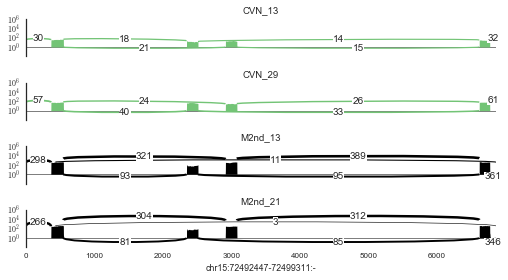

In [200]:
import os


g = sns.FacetGrid(pkm_summary_ids.query('notes == @case8'), 
                  row='bam_rmdup', hue='label', size=1, aspect=8, palette=palette)
g.map(wp.wasabiplot, 'bam_rmdup', chrom=chrom, start=start, stop=stop, strand=strand, warn_skipped=False)
g.set_titles('{row_name}')
for ax in g.axes.flat:
    title = ax.get_title()
    sample_id = '_'.join(os.path.basename(title).split('_')[:2])
    ax.set(title=sample_id)
    if ax.is_last_row():
        ax.set(xlabel=xlabel)
#     ax.grid('x', color='white', zorder=500)
ax.locator_params(nbins=4, axis='y')
yticks = [int(ytick) for ytick in ax.get_yticks() if ytick >= 0]
yticklabels = ['$10^{{{ytick}}}$'.format(ytick=ytick) for ytick in yticks]
ax.set(yticks=yticks, yticklabels=yticklabels);
#     ax.locator_params(nbins=3, axis='y')

[[<matplotlib.axis.YTick at 0x2aeb152e2c90>,

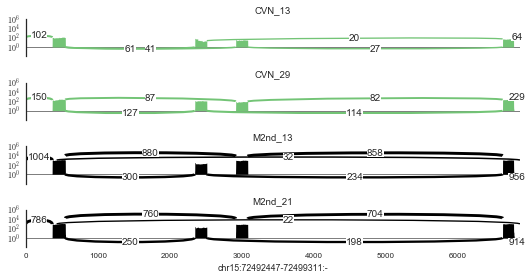

In [202]:
import os


g = sns.FacetGrid(pkm_summary_ids.query('notes == @case8'), 
                  row='bam_original', hue='label', size=1, aspect=8, palette=palette)
g.map(wp.wasabiplot, 'bam_original', chrom=chrom, start=start, stop=stop, strand=strand, warn_skipped=False)
g.set_titles('{row_name}')
for ax in g.axes.flat:
    title = ax.get_title()
    sample_id = '_'.join(os.path.basename(title).split('_')[:2])
    ax.set(title=sample_id)
    if ax.is_last_row():
        ax.set(xlabel=xlabel)
#     ax.grid('x', color='white', zorder=500)
ax.locator_params(nbins=4, axis='y')
yticks = [int(ytick) for ytick in ax.get_yticks() if ytick >= 0]
yticklabels = ['$10^{{{ytick}}}$'.format(ytick=ytick) for ytick in yticks]
ax.set(yticks=yticks, yticklabels=yticklabels);
#     ax.locator_params(nbins=3, axis='y')

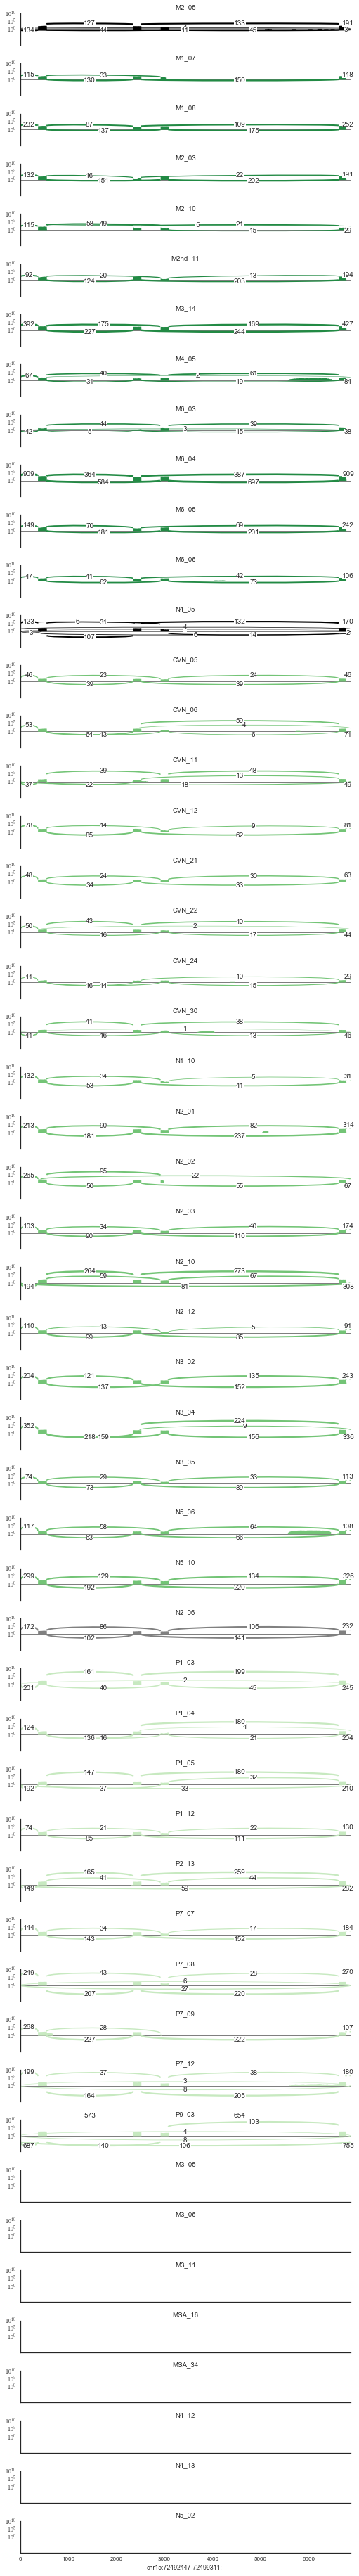

In [214]:
import os

data = pkm_summary_ids.query('notes == @case5')

g = sns.FacetGrid(data, row='bam_rmdup', hue='label', size=1, aspect=8, 
                  row_order=data['bam_rmdup'], 
                  palette=palette)
g.map(wp.wasabiplot, 'bam_rmdup', chrom=chrom, start=start, stop=stop, strand=strand, warn_skipped=False)
g.set_titles('{row_name}')
for ax in g.axes.flat:
    title = ax.get_title()
    sample_id = '_'.join(os.path.basename(title).split('_')[:2])
    ax.set(title=sample_id)
    if ax.is_last_row():
        ax.set(xlabel=xlabel)
#     ax.grid('x', color='white', zorder=500)
    ymin, ymax = ax.get_ylim()
g.set(ylim=(ymin, 10))
ax.locator_params(nbins=4, axis='y')
yticks = [int(ytick) for ytick in ax.get_yticks() if ytick >= 0]
yticklabels = ['$10^{{{ytick}}}$'.format(ytick=ytick) for ytick in yticks]
g.set(yticks=yticks, yticklabels=yticklabels);
#     ax.locator_params(nbins=3, axis='y')
g.savefig('{}/pkm_rmdup_case5_rmdup.pdf'.format(figure_folder))

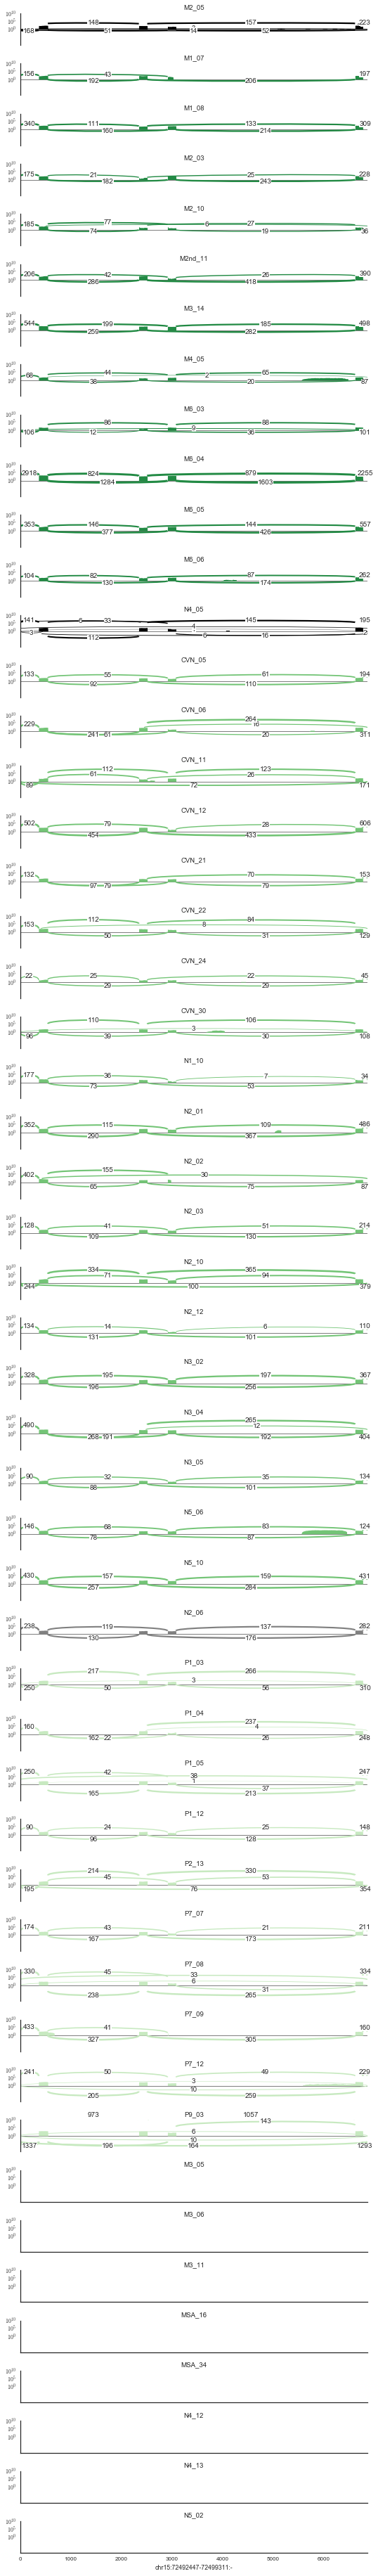

In [215]:
import os

data = pkm_summary_ids.query('notes == @case5')

g = sns.FacetGrid(data, row='bam_original', hue='label', size=1, aspect=8, 
                  row_order=data['bam_original'], palette=palette)
g.map(wp.wasabiplot, 'bam_original', chrom=chrom, start=start, stop=stop, strand=strand, warn_skipped=False)
g.set_titles('{row_name}')
for ax in g.axes.flat:
    title = ax.get_title()
    sample_id = '_'.join(os.path.basename(title).split('_')[:2])
    ax.set(title=sample_id)
    if ax.is_last_row():
        ax.set(xlabel=xlabel)
#     ax.grid('x', color='white', zorder=500)
    ymin, ymax = ax.get_ylim()
g.set(ylim=(ymin, 10))
ax.locator_params(nbins=4, axis='y')
yticks = [int(ytick) for ytick in ax.get_yticks() if ytick >= 0]
yticklabels = ['$10^{{{ytick}}}$'.format(ytick=ytick) for ytick in yticks]
g.set(yticks=yticks, yticklabels=yticklabels);
#     ax.locator_params(nbins=3, axis='y')
g.savefig('{}/pkm_rmdup_case5_original.pdf'.format(figure_folder))

## RPS24

In [238]:
pkm_summary_ids.head()

,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction24,notes,psi,sample_id,...,stressed,craig_venter,differentiation_batch,split,outlier,label,color,bam,bam_rmdup,bam_original
350180,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,133.0,0.0,45.0,44.0,Case 5: Unequal read coverage (one side has at...,NaN,M2_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,...,False,True,batch1,NaN,False,pooled,black,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...
350200,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,95.0,93.0,389.0,321.0,Case 8: Sufficient reads on all junctions,0.790646,M2nd_13_R1.fastq.gz.polyATrim.adapterTrim.rmRe...,...,False,True,batch2,NaN,False,pooled,black,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...
350208,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,85.0,81.0,312.0,304.0,Case 8: Sufficient reads on all junctions,0.787724,M2nd_21_R1.fastq.gz.polyATrim.adapterTrim.rmRe...,...,False,True,batch2,NaN,False,pooled,black,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...
350164,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,27.0,0.0,5.0,5.0,Case 4: Only one junction with sufficient reads,NaN,M1_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,...,False,True,batch1,NaN,False,single MN,#228a44,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...
350165,isoform1=junction:chr15:72494962-72499068:-@ex...,0.0,0.0,0.0,0.0,119.0,0.0,Case 4: Only one junction with sufficient reads,NaN,M1_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,...,False,True,batch1,NaN,False,single MN,#228a44,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...,/home/obotvinnik/projects/singlecell_pnms/anal...


In [236]:
rps24_summary_original.head()

,sample_id,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi,notes_copy,notes_abbrev
277606,CVN_01,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,0,NaN,729,677.0,NaN,Case 8: Inclusion,1.0,Case 7: Inclusion,Case 8
277607,CVN_02,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,0,NaN,451,419.0,NaN,Case 8: Inclusion,1.0,Case 7: Inclusion,Case 8
277608,CVN_03,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,0,NaN,345,330.0,NaN,Case 8: Inclusion,1.0,Case 7: Inclusion,Case 8
277609,CVN_04,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,0,NaN,402,417.0,NaN,Case 8: Inclusion,1.0,Case 7: Inclusion,Case 8
277610,CVN_05,isoform1=junction:chr10:79797063-79800372:+|is...,NaN,NaN,0,NaN,580,541.0,NaN,Case 8: Inclusion,1.0,Case 7: Inclusion,Case 8


In [99]:
sorted([np.random.randint(0, 100) for _ in range(5)], reverse=True)

[91, 89, 46, 38, 38]

In [103]:
import matplotlib.pyplot as plt

In [104]:
plt.fill_between?

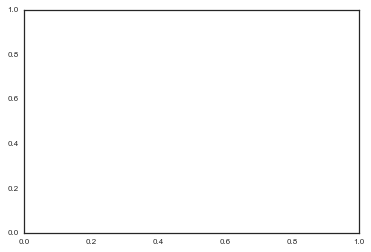

In [105]:
fig, ax = plt.subplots()

ax.